In [1]:
#import SparkSession
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
22,application_1589208887286_0023,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
spark=SparkSession.builder.appName('bigdata-project').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
df_confirmed=spark.read.csv('s3://fcortesj-eafit-20201/covid_datasets/global/confirmados/time_series_covid19_confirmed_global_narrow.csv',inferSchema=True,header=True)
df_deaths=spark.read.csv('s3://fcortesj-eafit-20201/covid_datasets/global/muertes/time_series_covid19_deaths_global_narrow.csv',inferSchema=True,header=True)
df_recovered=spark.read.csv('s3://fcortesj-eafit-20201/covid_datasets/global/recuperados/time_series_covid19_recovered_global_narrow.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
from pyspark.sql import functions as f
from pyspark.sql.functions import col, max as max_

#Analisis descriptivo de Casos en el Mundo
print('Los tres datafarmes contienten el siguiente numero de columnas {} las cuales son: {}'.format(len(df_confirmed.columns), df_confirmed.columns))
print('El dataframe contiene {} regiones/paises'.format(df_confirmed.select('Country/Region').distinct().count() - 1))
print('El dataframe de casos confirmados contiene: {} registros'.format(df_confirmed.count()))
print('El dataframe de muertes contiene: {} registros'.format(df_deaths.count()))
print('El dataframe de recuperados contiene: {} registros'.format(df_deaths.count()))

#Por pais top 20

print('A continuacion se observan los primeros 20 paises con el mayor numero de casos confirmados: ')
df_confirmed.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=False).show()

print('A continuacion se observan los primeros 20 paises con el menor numero de casos confirmados: ')
df_confirmed.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=True).show()

print('A continuacion se observan los primeros 20 paises con el mayor numero de muertes: ')
df_deaths.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=False).show()

print('A continuacion se observan los primeros 20 paises con el menor numero de muertes: ')
df_deaths.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=True).show()

print('A continuacion se observan los primeros 20 paises con el mayor numero de recuperaciones: ')
df_recovered.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=False).show()

print('A continuacion se observan los primeros 20 paises con el menor numero de recuperaciones: ')
df_recovered.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=True).show()

#Total en cada categoria

total_confirmed_per_country = df_confirmed.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value"))
total_confirmed = total_confirmed_per_country.withColumn("max(Value)", col("max(Value)").cast("int")).groupBy().agg(f.sum("max(Value)")).collect()
total_confirmed_date = df_confirmed.withColumn("Date", col("Date").cast("timestamp")).groupBy().agg(max_("Date")).collect()
print('El total de casos confirmados con covid es de {} en la fecha {}'.format(total_confirmed[0]['sum(max(Value))'], total_confirmed_date[0]['max(Date)']))

total_deaths_per_country = df_deaths.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value"))
total_deaths = total_deaths_per_country.withColumn("max(Value)", col("max(Value)").cast("int")).groupBy().agg(f.sum("max(Value)")).collect()
total_deaths_date = df_deaths.withColumn("Date", col("Date").cast("timestamp")).groupBy().agg(max_("Date")).collect()
print('El total de muertes por covid es de {} en la fecha {}'.format(total_deaths[0]['sum(max(Value))'], total_deaths_date[0]['max(Date)']))

total_recovered_per_country = df_recovered.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value"))
total_recovered = total_recovered_per_country.withColumn("max(Value)", col("max(Value)").cast("int")).groupBy().agg(f.sum("max(Value)")).collect()
total_recovered_date = df_recovered.withColumn("Date", col("Date").cast("timestamp")).groupBy().agg(max_("Date")).collect()
print('El total de recuperados de covid es de {} en la fecha {}'.format(total_recovered[0]['sum(max(Value))'], total_recovered_date[0]['max(Date)']))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Los tres datafarmes contienten el siguiente numero de columnas 10 las cuales son: ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Value', 'ISO 3166-1 Alpha 3-Codes', 'Region Code', 'Sub-region Code', 'Intermediate Region Code']
El dataframe contiene 187 regiones/paises
El dataframe de casos confirmados contiene: 28197 registros
El dataframe de muertes contiene: 28197 registros
El dataframe de recuperados contiene: 28197 registros
A continuacion se observan los primeros 20 paises con el mayor numero de casos confirmados: 
+--------------+----------+
|Country/Region|max(Value)|
+--------------+----------+
|            US|   1228603|
|         Spain|    220325|
|         Italy|    214457|
|United Kingdom|    201101|
|        France|    172465|
|       Germany|    168162|
|        Russia|    165929|
|        Turkey|    131744|
|        Brazil|    126611|
|          Iran|    101650|
|         China|     68128|
|          Peru|     54817|
|         India|     52987|
|       Belg

In [5]:
#Graficas exploratorias Mundiales
sc.install_pypi_package('pandas')
sc.install_pypi_package('matplotlib')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

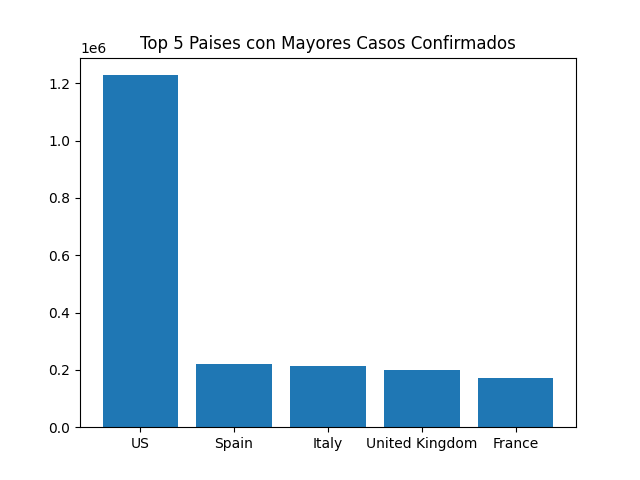

In [6]:
#Graficas exploratorias del mundo acerca del Covit
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

progressCases = df_confirmed.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=False)
x = progressCases.toPandas()['Country/Region'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

ax.bar(x[0:5],y[0:5])
ax.set_title('Top 5 Paises con Mayores Casos Confirmados')

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

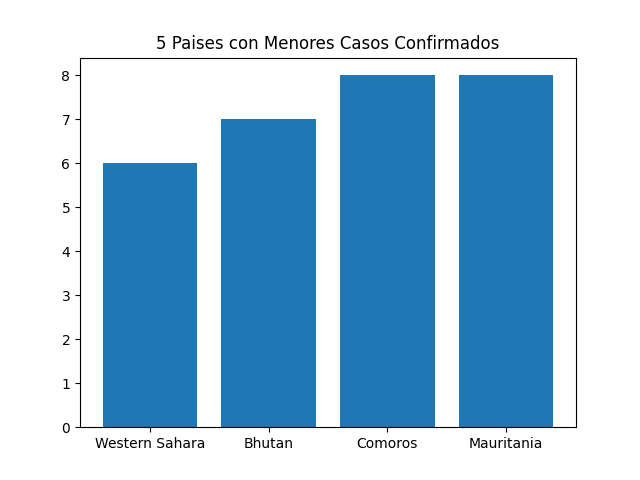

In [7]:
fig2, ax2 = plt.subplots()

progressCases = df_confirmed.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=True)
x = progressCases.toPandas()['Country/Region'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

ax2.bar(x[0:5],y[0:5])
ax2.set_title('5 Paises con Menores Casos Confirmados')

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

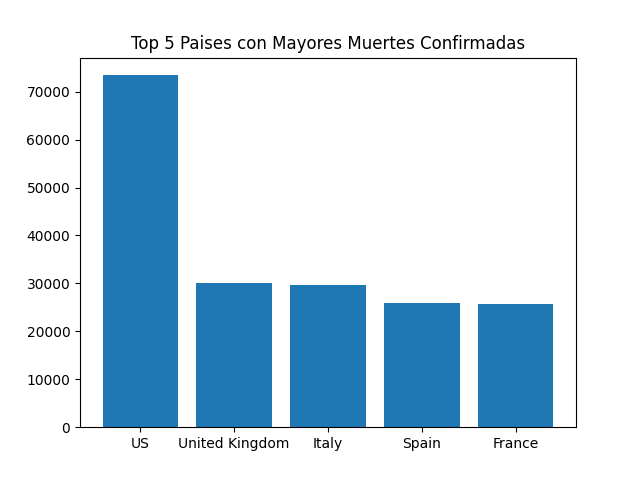

In [8]:
fig3, ax3 = plt.subplots()

progressCases = df_deaths.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=False)
x = progressCases.toPandas()['Country/Region'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

ax3.bar(x[0:5],y[0:5])
ax3.set_title('Top 5 Paises con Mayores Muertes Confirmadas')

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

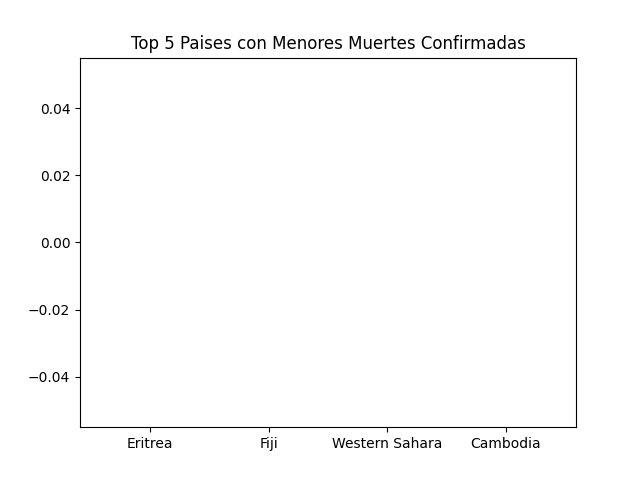

In [9]:
fig4, ax4 = plt.subplots()

progressCases = df_deaths.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=True)
x = progressCases.toPandas()['Country/Region'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

ax4.bar(x[0:5],y[0:5])
ax4.set_title('Top 5 Paises con Menores Muertes Confirmadas')

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

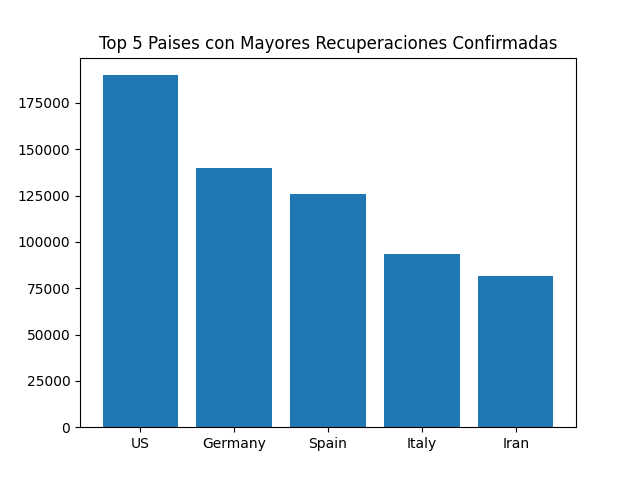

In [10]:
fig5, ax5 = plt.subplots()

progressCases = df_recovered.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=False)
x = progressCases.toPandas()['Country/Region'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

ax5.bar(x[0:5],y[0:5])
ax5.set_title('Top 5 Paises con Mayores Recuperaciones Confirmadas')

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

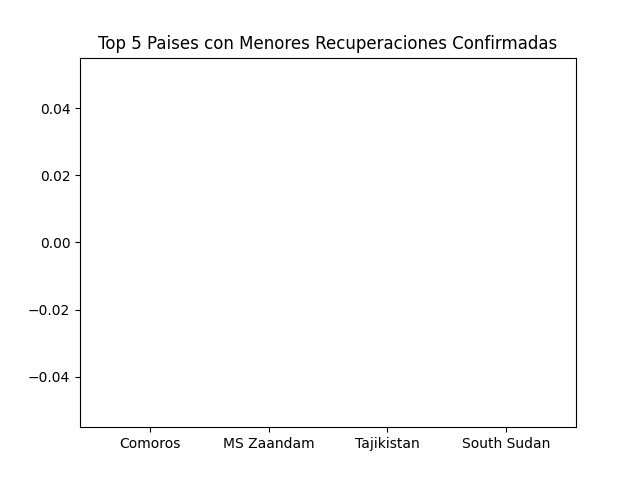

In [11]:
fig6, ax6 = plt.subplots()

progressCases = df_recovered.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_("Value")).orderBy('max(Value)',ascending=True)
x = progressCases.toPandas()['Country/Region'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

ax6.bar(x[0:5],y[0:5])
ax6.set_title('Top 5 Paises con Menores Recuperaciones Confirmadas')

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

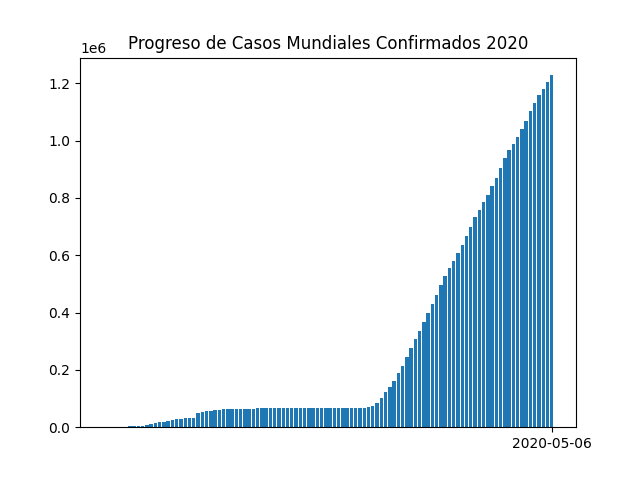

In [12]:
fig7, ax7 = plt.subplots()

progressCases = df_confirmed.withColumn("Value", col("Value").cast("int")).groupBy("Date").agg(max_("Value")).orderBy('max(Value)',ascending=True)
x = progressCases.toPandas()['Date'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

ax7.bar(x[1:],y[1:])
ax7.set_title('Progreso de Casos Mundiales Confirmados 2020')
ax7.set_xticks(x[-1:])

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

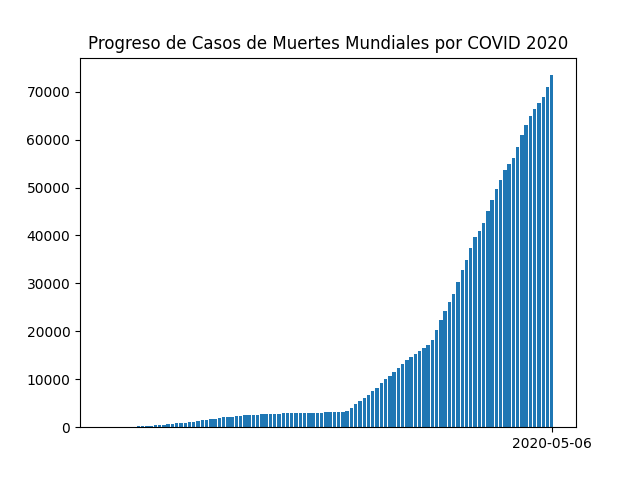

In [13]:
fig8, ax8 = plt.subplots()

progressCases = df_deaths.withColumn("Value", col("Value").cast("int")).groupBy("Date").agg(max_("Value")).orderBy('max(Value)',ascending=True)
x = progressCases.toPandas()['Date'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

ax8.bar(x[1:],y[1:])
ax8.set_title('Progreso de Casos de Muertes Mundiales por COVID 2020')
ax8.set_xticks(x[-1:])

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

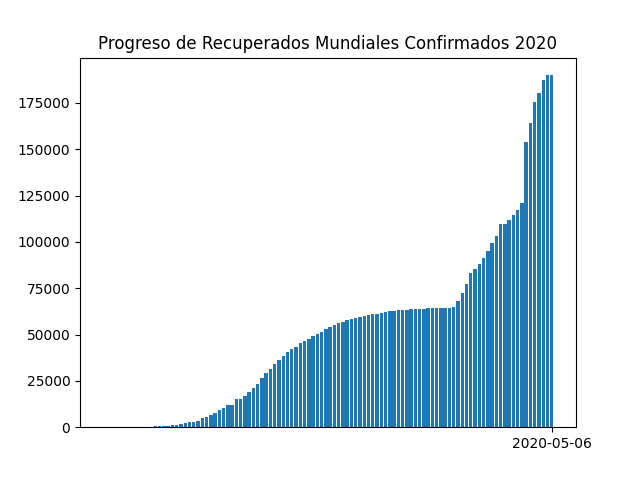

In [14]:
fig9, ax9 = plt.subplots()

progressCases = df_recovered.withColumn("Value", col("Value").cast("int")).groupBy("Date").agg(max_("Value")).orderBy('max(Value)',ascending=True)
x = progressCases.toPandas()['Date'].values.tolist()
y = progressCases.toPandas()['max(Value)'].values.tolist()

ax9.bar(x[1:],y[1:])
ax9.set_title('Progreso de Recuperados Mundiales Confirmados 2020')
ax9.set_xticks(x[-1:])

%matplot plt